In [1]:
import pandas as pd
import numpy as np
from scipy import stats as sp
import sys, os
sys.path.append('../')
import trace_analysis
import plots_analysis
import trace_statistics

# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
# SVM
from sklearn import svm

# Data Preparation


Prepare the data to be used with kNN

In [4]:
plots = [(os.getcwd() + '/traces/', '2019-01JAN-29-1'), 
         (os.getcwd() + '/traces/', '2019-01JAN-29-3'),
         (os.getcwd() + '/traces/', '2019-01JAN-29-3b241')]

stats = None
prova = []

for row in plots:
    label = 'Normal'
    
    # Assign a label
    if row[1].find('b') >= 0:
        label = 'Black Hole'
    nodes, packets_node = trace_analysis.process_iotlab_node_by_node2(row[0], row[1])
    
    # Update stats
    if stats is None:
        stats = trace_statistics.compute_labeled_statistics(nodes, packets_node, label)
    else:
        stats = pd.concat([stats, trace_statistics.compute_labeled_statistics(nodes, packets_node, label)])
    
        
stats = stats.reset_index(drop=True)
stats.head(5)

,node_id,count,mean,var,std,hop,min,max,loss,label
0,m3-154,149,12.754826,49.192361,7.013727,1,7.629,67.184,0.745,Normal
1,m3-156,92,21.553533,137.579800,11.729442,2,1.128,82.161,0.460,Normal
2,m3-157,143,22.899909,126.525155,11.248340,2,2.709,85.675,0.715,Normal
3,m3-171,139,21.608727,92.011184,9.592246,2,1.915,76.440,0.695,Normal
4,m3-173,87,23.609046,136.738146,11.693509,2,2.538,110.176,0.435,Normal


Select the set of features and labels that we use to fit the algorithm

In [5]:
# separate features from target values
features = stats.drop(columns=['node_id', 'label'])
target = stats['label'].values
print('Targets: ' + str(set(target)))

# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)

Targets: {'Normal', 'Black Hole'}


# K-Nearest Neighbor (KNN) Classification

Let us first observe the accuracies for different values of k

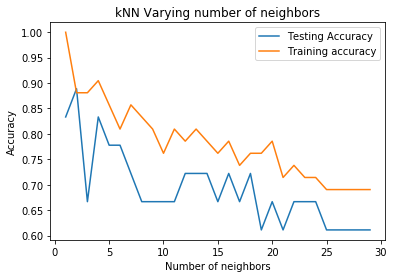

In [6]:
trace_analysis.knn_test_number_of_neighbors(X_train, X_test, y_train, y_test)

Let's build KNN classifier 

In [7]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=4)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("\n\n",classification_report(y_test,y_pred))


Accuracy: 0.8333333333333334


               precision    recall  f1-score   support

  Black Hole       0.75      0.86      0.80         7
      Normal       0.90      0.82      0.86        11

   micro avg       0.83      0.83      0.83        18
   macro avg       0.82      0.84      0.83        18
weighted avg       0.84      0.83      0.83        18



# Support Vector Machines (SVM) Classification

Let us first observe the accuracies for different values of k

In [8]:
#Create a svm Classifier
svm_clf = svm.SVC(kernel='linear', random_state=9, gamma='scale') # Linear Kernel

#Train the model using the training sets
svm_clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svm_clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("\n\n",classification_report(y_test,y_pred))

Accuracy: 0.8888888888888888


               precision    recall  f1-score   support

  Black Hole       1.00      0.71      0.83         7
      Normal       0.85      1.00      0.92        11

   micro avg       0.89      0.89      0.89        18
   macro avg       0.92      0.86      0.88        18
weighted avg       0.91      0.89      0.88        18

